# k平均クラスタリング(k-means)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# データ生成

In [2]:
def gen_data():
    x1 = np.random.normal(size=(100, 2)) + np.array([-5, -5])
    x2 = np.random.normal(size=(100, 2)) + np.array([5, -5])
    x3 = np.random.normal(size=(100, 2)) + np.array([0, 5])
    return np.vstack((x1, x2, x3))

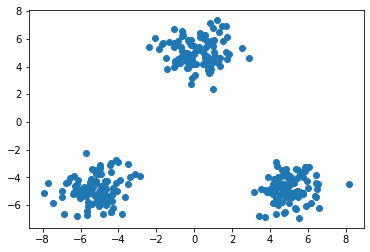

In [3]:
#データ作成
X_train = gen_data()
#データ描画
plt.scatter(X_train[:, 0], X_train[:, 1])

## 学習

k-meansアルゴリズムは以下のとおりである

1) 各クラスタ中心の初期値を設定する

2) 各データ点に対して、各クラスタ中心との距離を計算し、最も距離が近いクラスタを割り当てる

3) 各クラスタの平均ベクトル（中心）を計算する

4) 収束するまで2, 3の処理を繰り返す

In [4]:
def distance(x1, x2):
    return np.sum((x1 - x2)**2, axis=1)

n_clusters = 3
iter_max = 100

# 各クラスタ中心をランダムに初期化
centers = X_train[np.random.choice(len(X_train), n_clusters, replace=False)]

for _ in range(iter_max):
    prev_centers = np.copy(centers)
    D = np.zeros((len(X_train), n_clusters))
    # 各データ点に対して、各クラスタ中心との距離を計算
    for i, x in enumerate(X_train):
        D[i] = distance(x, centers)
    # 各データ点に、最も距離が近いクラスタを割り当
    cluster_index = np.argmin(D, axis=1)
    # 各クラスタの中心を計算
    for k in range(n_clusters):
        index_k = cluster_index == k
        centers[k] = np.mean(X_train[index_k], axis=0)
    # 収束判定
    if np.allclose(prev_centers, centers):
        break

## クラスタリング結果

In [5]:
def plt_result(X_train, centers, xx):
    #　データを可視化
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred, cmap='spring')
    # 中心を可視化
    plt.scatter(centers[:, 0], centers[:, 1], s=200, marker='X', lw=2, c='black', edgecolor="white")
    # 領域の可視化
    pred = np.empty(len(xx), dtype=int)
    for i, x in enumerate(xx):
        d = distance(x, centers)
        pred[i] = np.argmin(d)
    plt.contourf(xx0, xx1, pred.reshape(100, 100), alpha=0.2, cmap='spring')

In [6]:
y_pred = np.empty(len(X_train), dtype=int)
for i, x in enumerate(X_train):
    d = distance(x, centers)
    y_pred[i] = np.argmin(d)

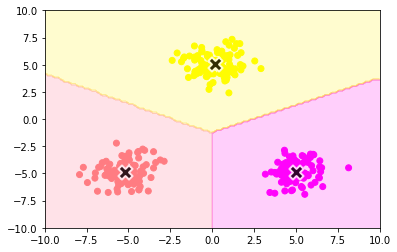

In [7]:
xx0, xx1 = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
xx = np.array([xx0, xx1]).reshape(2, -1).T

plt_result(X_train, centers, xx)

## numpy実装

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_train)

In [9]:
print("labels: {}".format(kmeans.labels_))
print("cluster_centers: {}".format(kmeans.cluster_centers_))
kmeans.cluster_centers_

labels: [3 2 3 3 2 2 3 2 3 3 3 2 2 2 3 3 3 2 3 3 2 3 2 3 3 3 2 2 2 3 2 3 2 3 3 3 3
 2 3 3 2 3 2 2 3 2 3 3 2 2 3 3 2 3 3 3 3 3 3 3 2 3 2 3 3 2 3 2 3 2 3 3 3 3
 3 3 2 3 2 2 3 2 2 3 3 2 3 2 3 3 3 2 2 3 3 2 3 2 3 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 4 4 4 4 4 1 1 4 1 4 4 4 1 4 4 1 1 1 1
 4 1 4 4 4 1 1 1 1 4 1 4 1 4 4 4 4 1 4 1 4 4 1 1 1 4 4 4 4 1 1 4 4 4 4 4 1
 1 4 1 1 1 4 1 1 1 4 1 1 4 4 4 1 4 1 1 1 1 4 1 4 1 1 1 1 4 4 1 1 1 1 4 4 4
 4 1 1 4]
cluster_centers: [[ 5.0160694  -4.83516684]
 [-0.67531871  4.93395155]
 [-4.64200964 -3.95372732]
 [-5.56392376 -5.40279913]
 [ 0.98460766  5.1207945 ]]


array([[ 5.0160694 , -4.83516684],
       [-0.67531871,  4.93395155],
       [-4.64200964, -3.95372732],
       [-5.56392376, -5.40279913],
       [ 0.98460766,  5.1207945 ]])

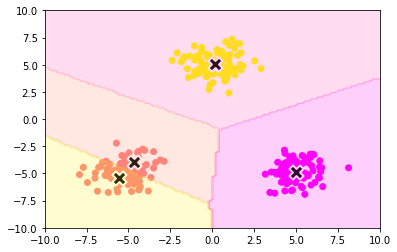

In [14]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X_train)
plt_result(X_train, kmeans.cluster_centers_, xx)

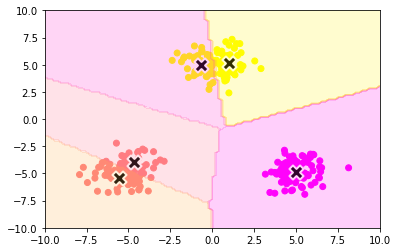

In [13]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_train)
plt_result(X_train, kmeans.cluster_centers_, xx)

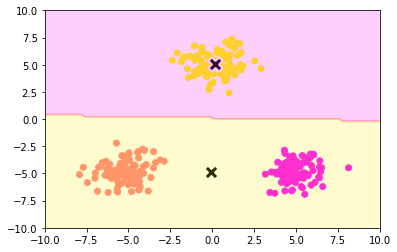

In [15]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train)
plt_result(X_train, kmeans.cluster_centers_, xx)